<a href="https://colab.research.google.com/github/edakilicaslan1/Digit_Recognition/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Importing libraries
import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils

In [6]:
model = Sequential()

In [14]:
#Adding input layer

In [8]:
model.add(Dense(512, input_shape = (784,)))

In [9]:
model.add(Activation('relu'))

In [10]:
model.add(Dropout(0.2))

In [15]:
#Adding hidden layer

In [11]:
model.add(Dense(512))

In [12]:
model.add(Activation('relu'))

In [13]:
model.add(Dropout(0.2))

In [17]:
#Adding output layer

In [18]:
model.add(Dense(10))

In [19]:
model.add(Activation('softmax'))

In [20]:
#Compiling the model

In [21]:
model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],
              optimizer = 'adam')

In [22]:
#Loading data

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


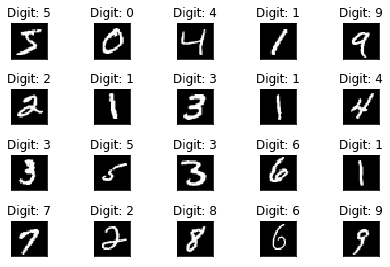

In [30]:
for i in range(20):
   plt.subplot(4,5,i+1)
   plt.tight_layout()
   plt.imshow(x_train[i], cmap='gray', interpolation='none')
   plt.title("Digit: {}".format(y_train[i]))
   plt.xticks([])
   plt.yticks([])

In [31]:
#Reshaping input vector

In [32]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [33]:
#Normalizing data

In [34]:
x_train = x_train.astype('float32')
x_test =  x_test.astype('float32')
x_train /= 255
x_test /= 255

In [35]:
x_train[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
x_test[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

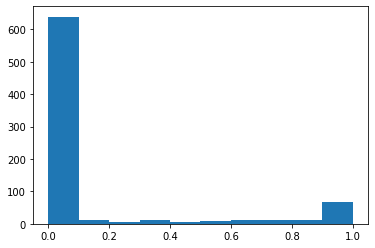

In [39]:
plt.hist(x_train[0]);

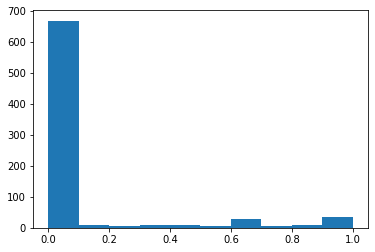

In [40]:
plt.hist(x_train[2]);

In [43]:
#Examining data distribution

In [44]:
print(np.unique(y_train, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [46]:
#There are 5923 pieces of digit 0, 6742 pieces of digit 1 and so on.

In [47]:
#Encoding data

In [49]:
classes = 10
y_train = np_utils.to_categorical(y_train, classes)

In [50]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [51]:
y_test = np_utils.to_categorical(y_test, classes)

In [52]:
for i in range(10):
  print(y_test[i])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [53]:
#Training the model

In [54]:
df = model.fit(x_train, y_train,batch_size = 128,
               epochs = 20, verbose = 2,
               validation_data = (x_test,y_test))

Epoch 1/20
469/469 - 24s - loss: 0.2408 - accuracy: 0.9260 - val_loss: 0.1210 - val_accuracy: 0.9613
Epoch 2/20
469/469 - 8s - loss: 0.1183 - accuracy: 0.9634 - val_loss: 0.0955 - val_accuracy: 0.9681
Epoch 3/20
469/469 - 9s - loss: 0.0917 - accuracy: 0.9717 - val_loss: 0.0703 - val_accuracy: 0.9781
Epoch 4/20
469/469 - 9s - loss: 0.0764 - accuracy: 0.9759 - val_loss: 0.0973 - val_accuracy: 0.9720
Epoch 5/20
469/469 - 8s - loss: 0.0709 - accuracy: 0.9775 - val_loss: 0.0919 - val_accuracy: 0.9738
Epoch 6/20
469/469 - 9s - loss: 0.0627 - accuracy: 0.9798 - val_loss: 0.0691 - val_accuracy: 0.9778
Epoch 7/20
469/469 - 9s - loss: 0.0566 - accuracy: 0.9825 - val_loss: 0.0732 - val_accuracy: 0.9791
Epoch 8/20
469/469 - 9s - loss: 0.0525 - accuracy: 0.9834 - val_loss: 0.0712 - val_accuracy: 0.9801
Epoch 9/20
469/469 - 9s - loss: 0.0514 - accuracy: 0.9837 - val_loss: 0.0813 - val_accuracy: 0.9797
Epoch 10/20
469/469 - 9s - loss: 0.0471 - accuracy: 0.9848 - val_loss: 0.0721 - val_accuracy: 0.980

In [55]:
#Model Performance

In [56]:
loss_accuracy = model.evaluate(x_test, y_test, verbose = 2)

313/313 - 1s - loss: 0.1013 - accuracy: 0.9804


In [63]:
#Predicting on Test Data

In [80]:
predictions = model.predict_classes(x_test)
predictions[:100]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9])